## Importing the Libraries

In [986]:
#import bamboolib as bam 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import statsmodels.api as sm  
import warnings
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_squared_error
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import math
from random import uniform
from scipy.stats import  randint as sp_randint
import urllib.request
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')

## Loading the File

In [987]:
#Loading the Dataset
df=pd.read_csv("/Users/VizBenz/Documents/My Python Directory/ALY6040/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [988]:
pwd

'/Users/VizBenz/Documents/My Python Directory/ALY6040'

In [989]:
# Checking the Size of the dataset 
df.shape

(21613, 21)

#### Notes: The Seattle King County dataset has 21613 rows and 21 columns

In [990]:
# Checking the Data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [991]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [992]:
# Identifying the columns 
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [993]:
# Summary of dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Note: Average house having 2 bathrooms or the most recent house being built in 2015. However, there is cause for concern with some variables (the max number of bedrooms in a house is 33

## Checking for missing values

In [994]:
# percentage of missing values per column
(df.isna().sum() / len(df)) * 100

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

## Checking for duplicates

In [995]:
# Check to see if 'id' is unique identifier for each sample
print('Sum of duplicate values:{}\n'.format(df.id.duplicated().sum()))

Sum of duplicate values:177



In [996]:
df.loc[df.id.duplicated(), :]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
325,7520000520,20150311T000000,240500.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
346,3969300030,20141229T000000,239900.0,4,1.00,1000,7134,1.0,0,0,...,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
372,2231500030,20150324T000000,530000.0,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,7853400250,20150219T000000,645000.0,4,3.50,2910,5260,2.0,0,0,...,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260
20613,2724049222,20141201T000000,220000.0,2,2.50,1000,1092,2.0,0,0,...,7,990,10,2004,0,98118,47.5419,-122.271,1330,1466
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598


#### Notes : Analysing duplicate id rows: The duplicate ids as shows above does mean its the same property, however at a different time. If there is a price chnage of a property, that is listed as another row with the same id for reference. Hence we can decide to keep the duplicate id rows as they provide a more comprehensive way of understanding how the prices changed over the period of 2014 and 2015.

In [997]:
#drop duplicates and only keep the most current data
df = df.sort_values('id', ascending = False).drop_duplicates(subset = 'id', keep = 'first')

In [998]:
#check again
df['id'].duplicated().sum()

0

In [999]:
#recheck dataframe shape
df.shape

(21436, 21)

In [1000]:
duplicate = df[df.duplicated()]  
print("Duplicate Rows :",duplicate)

Duplicate Rows : Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


## Data Cleansing

#### Date column has some redundant data. The H:M:S part of data is not useful as it always is 'T000000'. Hence will clean up the H:M:S. Transforming date column into year, month, and day

### a) Column 'date'

In [1001]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
15951,9900000190,2014-10-30,268950.0,3,1.00,1320,8100,1.0,0,0,...,1943,0,98166,47.4697,-122.351,1000,8100,2014,10,30
20979,9895000040,2014-07-03,399900.0,2,1.75,1410,1005,1.5,0,0,...,2011,0,98027,47.5446,-122.018,1440,1188,2014,7,3
7621,9842300540,2014-06-24,339000.0,3,1.00,1100,4128,1.0,0,0,...,1942,0,98126,47.5296,-122.379,1510,4538,2014,6,24
3260,9842300485,2015-03-11,380000.0,2,1.00,1040,7372,1.0,0,0,...,1939,0,98126,47.5285,-122.378,1930,5150,2015,3,11
16737,9842300095,2014-07-25,365000.0,5,2.00,1600,4168,1.5,0,0,...,1927,0,98126,47.5297,-122.381,1190,4168,2014,7,25


### b) Column 'bedrooms'

In [1002]:
# check bedrooms columns
df['bedrooms'].value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      194
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [1003]:
# look closer for bedrroms >= 10
df.loc[df['bedrooms'] >= 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
19254,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0,0,...,1913,0,98105,47.6635,-122.320,1810,3745,2014,12,29
15161,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0,0,...,1958,0,98006,47.5705,-122.175,2040,11914,2014,10,29
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,1947,0,98103,47.6878,-122.331,1330,4700,2014,6,25
8757,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,...,1918,1999,98106,47.5560,-122.363,1420,4960,2014,8,21
13314,627300145,2014-08-14,1148000.0,10,5.25,4590,10920,1.0,0,2,...,2008,0,98004,47.5861,-122.113,2730,10400,2014,8,14


In [1004]:
# drop row with 33 bedrooms. not matching per tot. sq.ft
df.drop(index=15870,inplace = True)

## Feature Engineering

In [1005]:
#drop the entire 'id' and 'date' since we already dealt with its duplicates and converted date to year,month,day
df = df.drop("id",axis=1)
df = df.drop("date",axis=1)

In [1006]:
# Calculating the Age of the House
from datetime import datetime, date
df['age']= 2015- df['yr_built']
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,age
15951,268950.0,3,1.00,1320,8100,1.0,0,0,3,6,...,0,98166,47.4697,-122.351,1000,8100,2014,10,30,72
20979,399900.0,2,1.75,1410,1005,1.5,0,0,3,9,...,0,98027,47.5446,-122.018,1440,1188,2014,7,3,4
7621,339000.0,3,1.00,1100,4128,1.0,0,0,4,7,...,0,98126,47.5296,-122.379,1510,4538,2014,6,24,73
3260,380000.0,2,1.00,1040,7372,1.0,0,0,5,7,...,0,98126,47.5285,-122.378,1930,5150,2015,3,11,76
16737,365000.0,5,2.00,1600,4168,1.5,0,0,3,7,...,0,98126,47.5297,-122.381,1190,4168,2014,7,25,88


In [1007]:
# binning the age of the building column

bin_age = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']

df['age_group'] = pd.cut(df['age'], bins = bin_age, labels = labels)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,age,age_group
15951,268950.0,3,1.00,1320,8100,1.0,0,0,3,6,...,98166,47.4697,-122.351,1000,8100,2014,10,30,72,51-75
20979,399900.0,2,1.75,1410,1005,1.5,0,0,3,9,...,98027,47.5446,-122.018,1440,1188,2014,7,3,4,1-5
7621,339000.0,3,1.00,1100,4128,1.0,0,0,4,7,...,98126,47.5296,-122.379,1510,4538,2014,6,24,73,51-75
3260,380000.0,2,1.00,1040,7372,1.0,0,0,5,7,...,98126,47.5285,-122.378,1930,5150,2015,3,11,76,76-100
16737,365000.0,5,2.00,1600,4168,1.5,0,0,3,7,...,98126,47.5297,-122.381,1190,4168,2014,7,25,88,76-100


In [1008]:
# getting price per sqft
df['price_per_sqft'] = df['price'] / df['sqft_lot']
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,year,month,day,age,age_group,price_per_sqft
15951,268950.0,3,1.00,1320,8100,1.0,0,0,3,6,...,47.4697,-122.351,1000,8100,2014,10,30,72,51-75,33.203704
20979,399900.0,2,1.75,1410,1005,1.5,0,0,3,9,...,47.5446,-122.018,1440,1188,2014,7,3,4,1-5,397.910448
7621,339000.0,3,1.00,1100,4128,1.0,0,0,4,7,...,47.5296,-122.379,1510,4538,2014,6,24,73,51-75,82.122093
3260,380000.0,2,1.00,1040,7372,1.0,0,0,5,7,...,47.5285,-122.378,1930,5150,2015,3,11,76,76-100,51.546392
16737,365000.0,5,2.00,1600,4168,1.5,0,0,3,7,...,47.5297,-122.381,1190,4168,2014,7,25,88,76-100,87.571977


In [1009]:
bin_price =[0,250000,500000,750000, 1000000, 2000000, df['price'].max()]
label_price = ['upto 250k', 'upto 500k', 'upto 750k','upto 1mil','upto 2mil', 'more than 2 mil']

df['price_group'] = pd.cut(df['price'], bins = bin_price, labels = label_price)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,year,month,day,age,age_group,price_per_sqft,price_group
15951,268950.0,3,1.00,1320,8100,1.0,0,0,3,6,...,-122.351,1000,8100,2014,10,30,72,51-75,33.203704,upto 500k
20979,399900.0,2,1.75,1410,1005,1.5,0,0,3,9,...,-122.018,1440,1188,2014,7,3,4,1-5,397.910448,upto 500k
7621,339000.0,3,1.00,1100,4128,1.0,0,0,4,7,...,-122.379,1510,4538,2014,6,24,73,51-75,82.122093,upto 500k
3260,380000.0,2,1.00,1040,7372,1.0,0,0,5,7,...,-122.378,1930,5150,2015,3,11,76,76-100,51.546392,upto 500k
16737,365000.0,5,2.00,1600,4168,1.5,0,0,3,7,...,-122.381,1190,4168,2014,7,25,88,76-100,87.571977,upto 500k


In [1010]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21435 entries, 15951 to 2497
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           21435 non-null  float64 
 1   bedrooms        21435 non-null  int64   
 2   bathrooms       21435 non-null  float64 
 3   sqft_living     21435 non-null  int64   
 4   sqft_lot        21435 non-null  int64   
 5   floors          21435 non-null  float64 
 6   waterfront      21435 non-null  int64   
 7   view            21435 non-null  int64   
 8   condition       21435 non-null  int64   
 9   grade           21435 non-null  int64   
 10  sqft_above      21435 non-null  int64   
 11  sqft_basement   21435 non-null  int64   
 12  yr_built        21435 non-null  int64   
 13  yr_renovated    21435 non-null  int64   
 14  zipcode         21435 non-null  int64   
 15  lat             21435 non-null  float64 
 16  long            21435 non-null  float64 
 17  sqft_livi

## BoxPlot: Checking and Handling Outliers

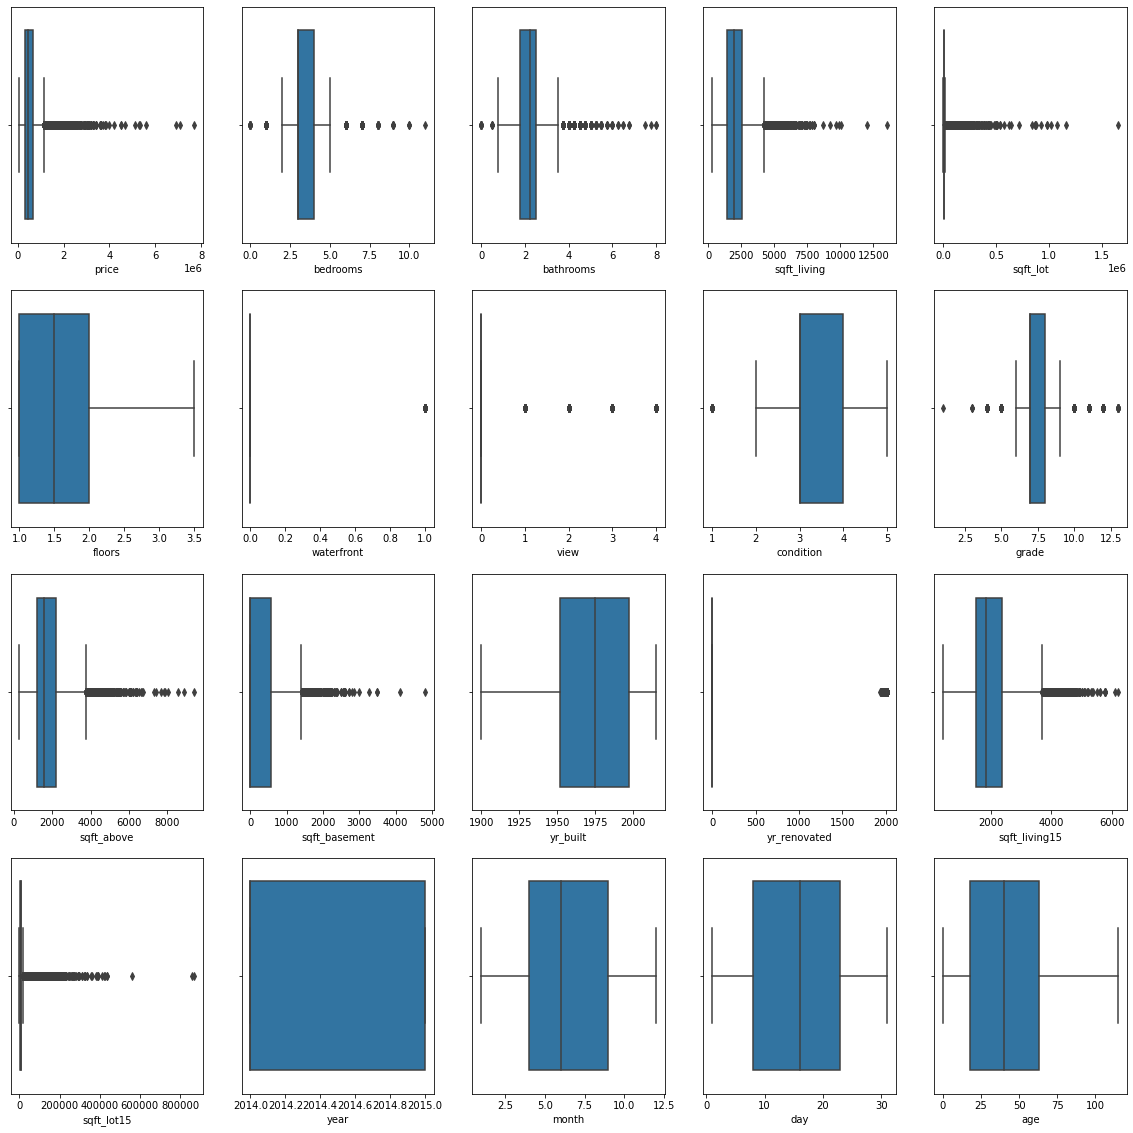

In [1011]:
# ploting boxplot for all the columns to see distribution of the data in each columns 

df_describe = df.drop(columns = ['lat','long', 'zipcode','price_per_sqft','price_group','age_group'])

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_describe.columns:
    plt.subplot(4,5,x)
    sns.boxplot(df_describe[column])
    x+=1
plt.tight_layout
plt.show()

# from this box plot below we can see there are outliers in many of the columns

In [1012]:
### Checking the value that's unsual 
# bedroom and bathroom that's 0 

df[df['bedrooms'] < 1]

# there are rows that does not have bedrooms, which is kind of weird for a house
# i will treat this like a null value and fill it with median numbers of bedroom in a house 
# same goes to the bathrooms with 0 values as well 

# Since House with no bathroom / bedrooms is kind of unsual i will replace the 0 value in both of the columns with median
# I used median instead of mean because the data distribution is skewed

df['bedrooms'] = df['bedrooms'].replace(0, df['bedrooms'].median())
df['bathrooms'] = df['bathrooms'].replace(0, df['bathrooms'].median())



In [1013]:
#Rechecking Bathrooms and bedrooms
df[df['bedrooms'] < 1]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,year,month,day,age,age_group,price_per_sqft,price_group


## Exploratory Data Analysis using Visualization 

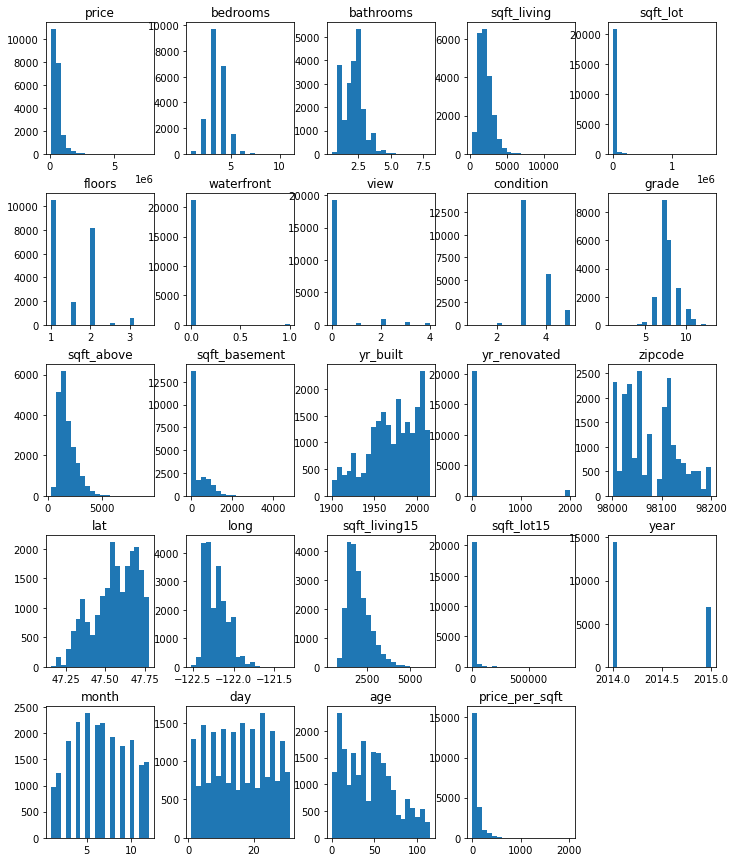

In [1014]:
# Visualizing the distribution 
df.hist(figsize=(12,15),bins=20, grid=False)
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

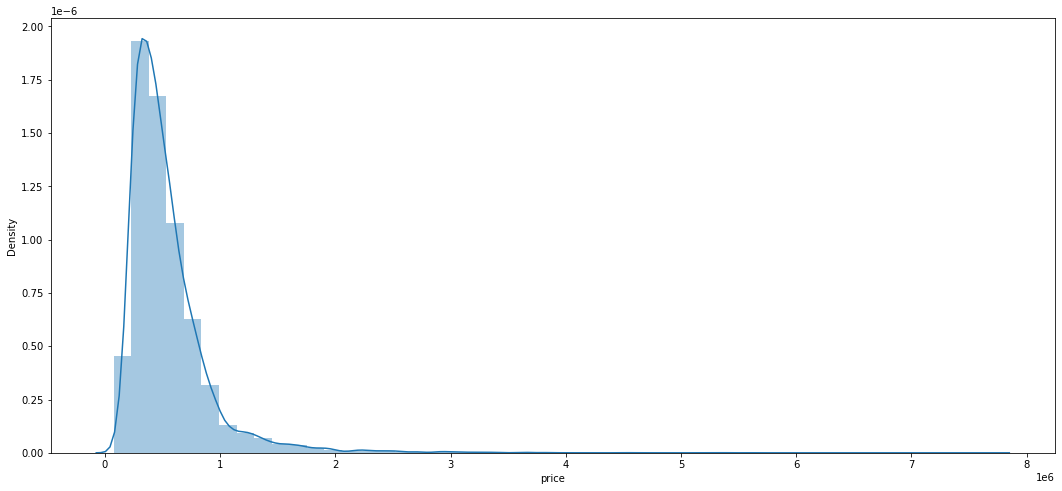

In [1015]:
plt.figure(figsize = (18, 8))
sns.distplot(df['price'])

# Majority of the prices are  less than 1000000 $ (right skewed)
# this distribution plot does not tell much about anything

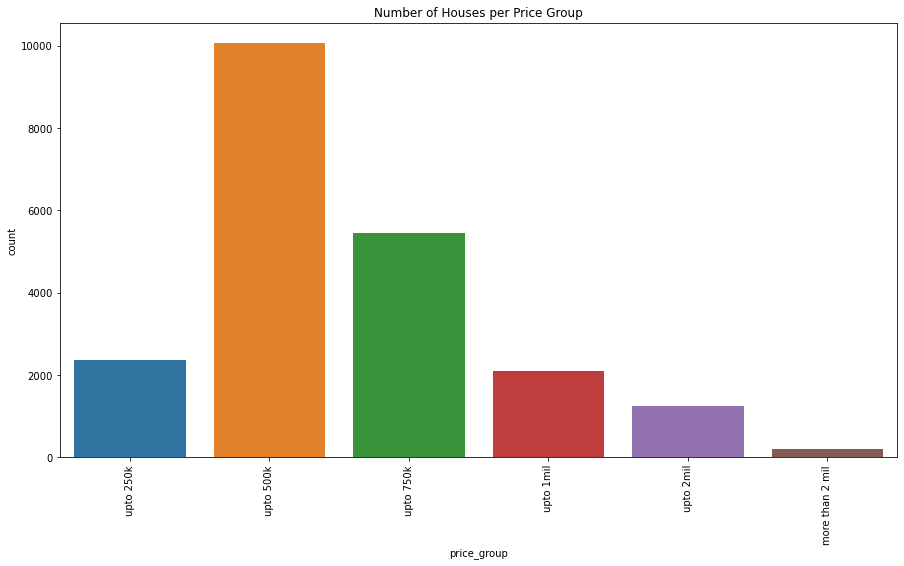

In [1016]:
plt.figure(figsize = (15, 8))

sns.countplot(df['price_group'])
plt.xticks(rotation = 90)
plt.title('Number of Houses per Price Group')

plt.show()

<AxesSubplot:xlabel='waterfront', ylabel='count'>

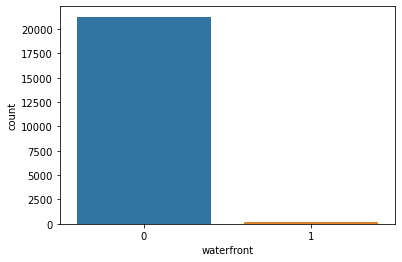

In [1017]:
sns.countplot(df['waterfront'])

# almost all of the house in this dataset doesn't have a front facing waterfront
# Waterfront is not a feature that many buyer considered before buying a home in King county 

Text(0.5, 1.0, 'Number of house sold per view rating')

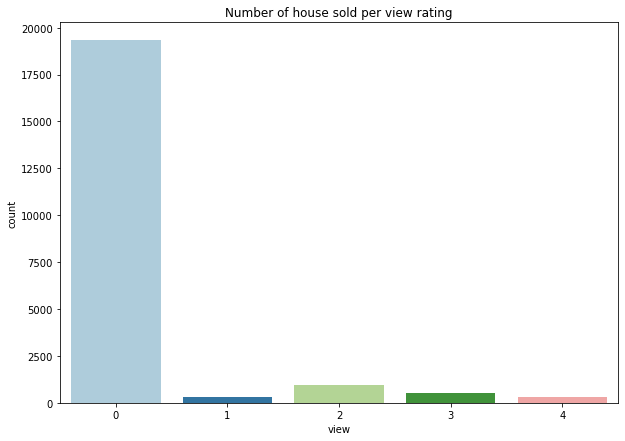

In [1018]:
plt.figure(figsize = (10, 7))
sns.countplot(df['view'], palette = 'Paired')
plt.title('Number of house sold per view rating')

# 90 % of the house sold has 0 view 
# this shows that buyer in king county WA doesn't really care about view rating of a house 

Text(0.5, 1.0, 'Number of Bathrooms')

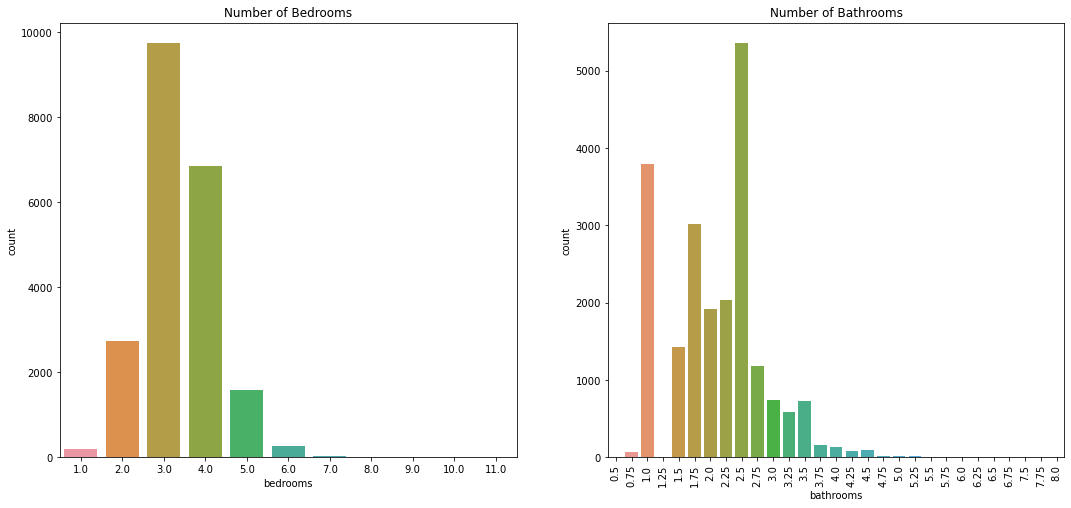

In [1019]:
plt.figure(figsize = (18, 8))
plt.subplot(1,2,1)
sns.countplot(df['bedrooms'])
plt.title('Number of Bedrooms')
plt.subplot(1,2,2)
sns.countplot(df['bathrooms'])
plt.xticks(rotation = 90)
plt.title('Number of Bathrooms')

# Buyer in king county preffered a house that has 3 to 4 bedrooms and 1 to 2.5 bathrooms

Text(0.5, 1.0, 'Number of Houses per Age Group')

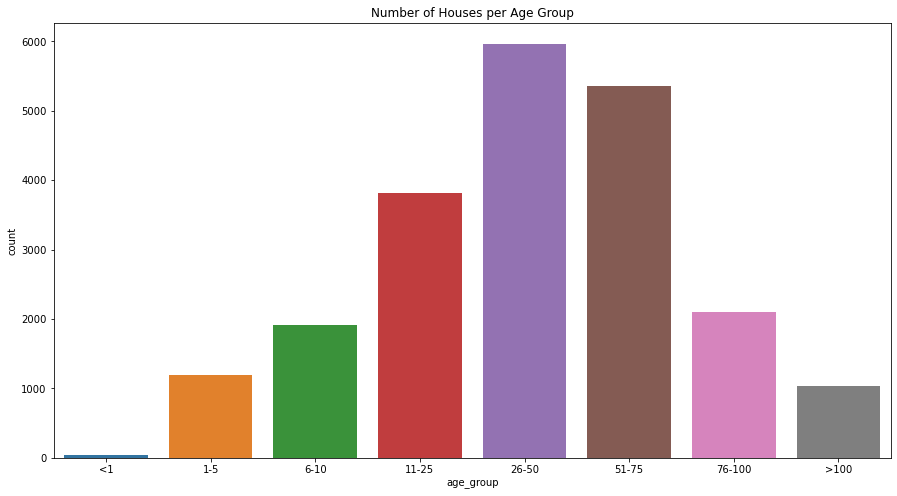

In [1020]:
plt.figure(figsize = (15, 8))

sns.countplot(df['age_group'])
plt.title('Number of Houses per Age Group')

## HeatMap

<AxesSubplot:>

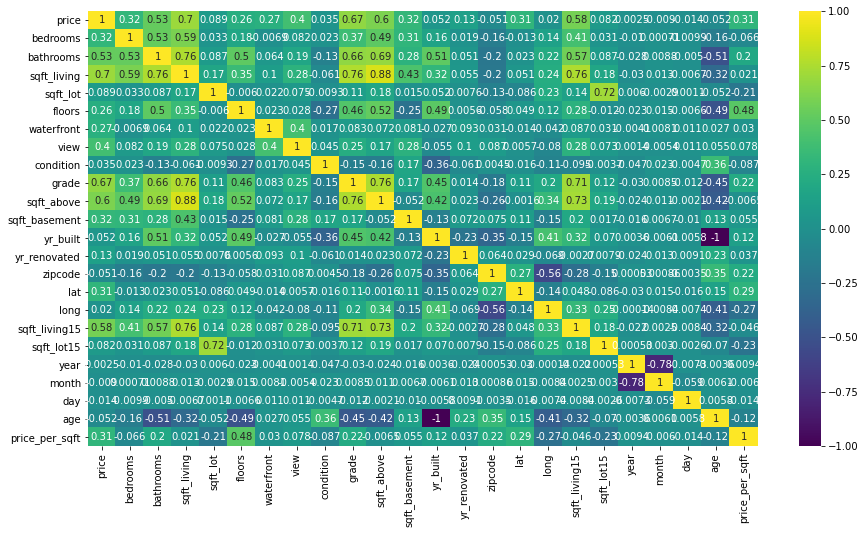

In [1021]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [1022]:
correlation = df.corr()
correlation['price'].sort_values(ascending = False)[1:]

# columns ordered from the higest posisve correlation to the lowest

sqft_living       0.701495
grade             0.666792
sqft_above        0.604867
sqft_living15     0.584216
bathrooms         0.525205
view              0.396771
sqft_basement     0.323710
bedrooms          0.316628
lat               0.306425
price_per_sqft    0.306366
waterfront        0.266984
floors            0.255446
yr_renovated      0.126779
sqft_lot          0.088754
sqft_lot15        0.081860
yr_built          0.051838
condition         0.034687
long              0.019865
year              0.002520
month            -0.009044
day              -0.014124
zipcode          -0.051478
age              -0.051838
Name: price, dtype: float64

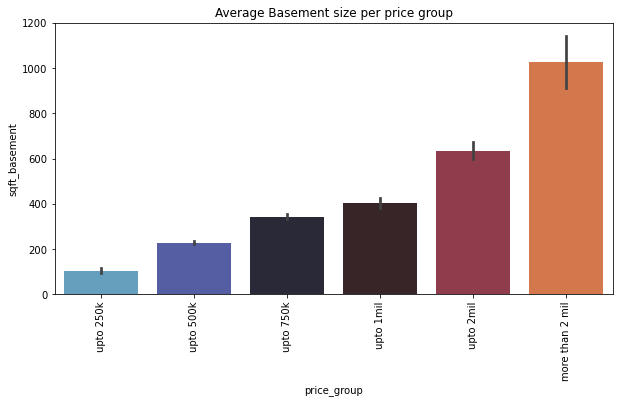

In [1023]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'price_group', y='sqft_basement', data = df ,palette = 'icefire')
plt.xticks(rotation = 90)
plt.title('Average Basement size per price group')
plt.show()

# The bigger the basement size the higher the value of a house

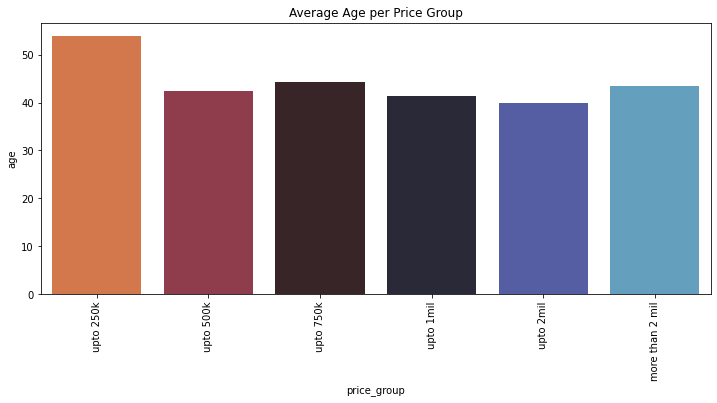

In [1024]:
plt.figure(figsize = (12 , 5))
sns.barplot(x = df['price_group'], y= df['age'], ci = False, palette = 'icefire_r')
plt.title('Average Age per Price Group')
plt.xticks(rotation = 90)
plt.show()
# the age group of the house doesn't really have a positve or negative correlation with the price
# house that's on the lower price tend to be older in average 

In [1025]:
print("Grade counting description")
print(df['grade'].value_counts())

Grade counting description
7     8895
8     6044
9     2606
6     1995
10    1130
11     396
5      234
12      89
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


In [1026]:
# Average house prices by zipcode

# Function to output average price for a given zipcode
def zip_avg(zipcode):
    zip_avg = []
    for _zip in zipcode:
        _zip = df[(df['zipcode'] == _zip)]
        zip_avg.append(_zip['price'].mean())
    return (zip_avg)

# Extracting unique zip codes from the dataset
all_zipcodes = df.zipcode.unique()
# Sorting them for better accessibility
all_zipcodes.sort()
# Extracting average price for each zipcode
zipcode_average = list(zip_avg(all_zipcodes))

# Creating the dataframe of average price and their corrsponding zipcode
price_by_zipcode = pd.DataFrame([])
price_by_zipcode['Zipcodes'] = all_zipcodes
price_by_zipcode["Average_house_price"] = zipcode_average

#sorting by price
price_by_zipcode = price_by_zipcode.sort_values(by=['Average_house_price']).reset_index(drop=True)
price_by_zipcode


,Zipcodes,Average_house_price
0,98002,2.346067e+05
1,98168,2.420690e+05
2,98032,2.524153e+05
3,98001,2.818724e+05
4,98148,2.820498e+05
...,...,...
65,98102,9.012583e+05
66,98112,1.095800e+06
67,98040,1.194230e+06
68,98004,1.354742e+06


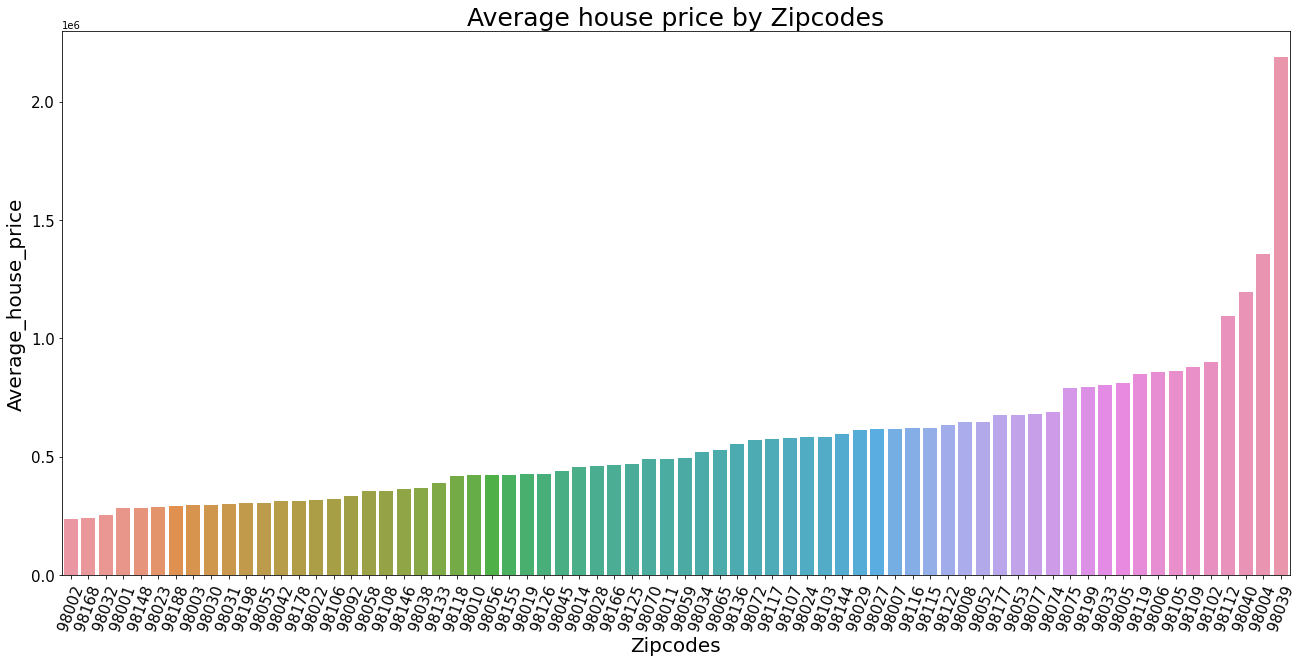

In [1027]:
plt.figure(figsize=(22,10))
plt.xticks(rotation=70, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Average house price by Zipcodes', fontsize=25)
plt.xlabel('Zipcodes', fontsize=20)
plt.ylabel('Avg',fontsize=20)

sns.barplot(y=price_by_zipcode['Average_house_price'], x=price_by_zipcode['Zipcodes'], order=price_by_zipcode['Zipcodes'])

plt.show()

# House in zipcode 98039,98004, 98040 are the top 3 zipcode with the highest average price 
# House in zipcode 98002,98168, 98032 are the top 3 zipcode with the lowest average price

In [1028]:
pd.crosstab(index = df['zipcode'], columns = 'Average_Price', values = df['price'], aggfunc = 'mean').sort_values('Average_Price',ascending = False).head(3)

col_0,Average_Price
zipcode,
98039,2.186843e+06
98004,1.354742e+06
98040,1.194230e+06


In [1029]:
pd.crosstab(index = df['zipcode'], columns = 'Average_Price', values = df['price'], aggfunc = 'mean').sort_values('Average_Price',ascending = True).head(3)

col_0,Average_Price
zipcode,
98002,234606.715736
98168,242068.965909
98032,252415.284553


Text(0.5, 1.0, 'Average Prices Per Quality')

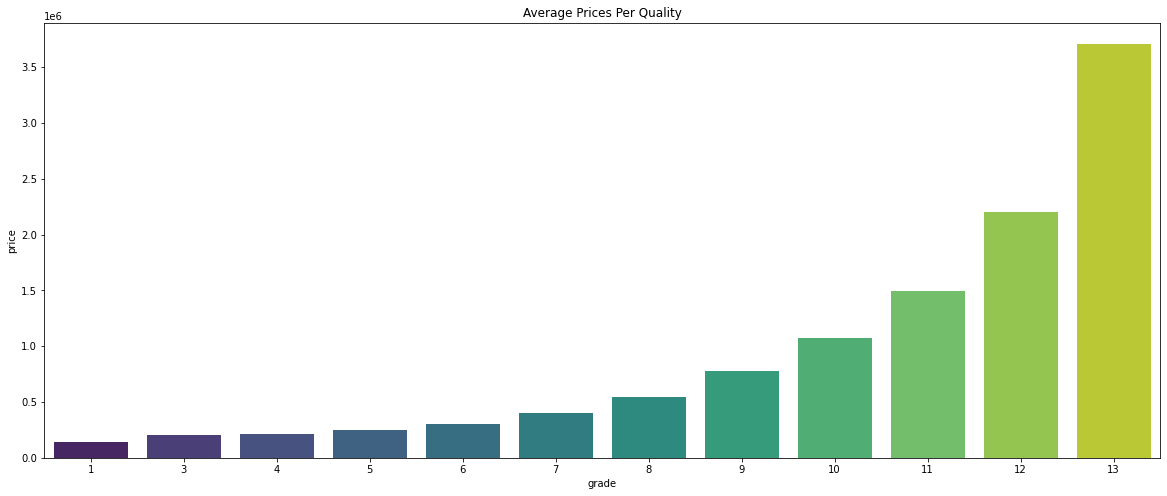

In [1030]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'grade', y='price', data = df, ci = False, palette = 'viridis')
plt.title('Average Prices Per Quality')


Text(0.5, 1.0, 'Average Prices Per Number of Bathrooms')

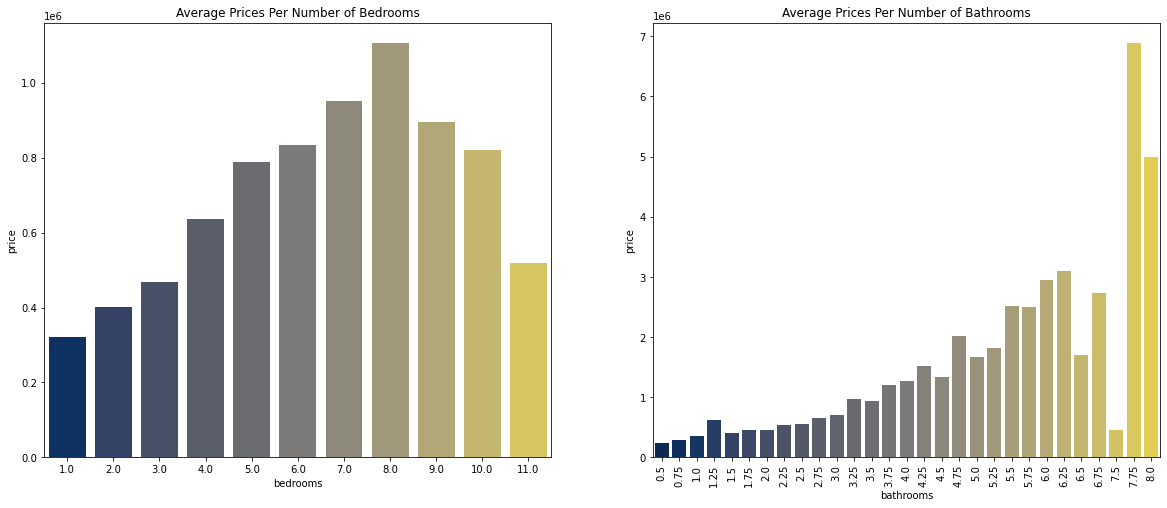

In [1031]:
plt.figure(figsize = (20, 8))
plt.subplot(1,2,1)
sns.barplot(x = 'bedrooms', y='price', data = df, ci = False, palette = 'cividis')
plt.title('Average Prices Per Number of Bedrooms')
plt.subplot(1,2,2)
sns.barplot(x = 'bathrooms', y='price', data = df, ci = False, palette = 'cividis')
plt.xticks(rotation = 90)
plt.title('Average Prices Per Number of Bathrooms')


# The more the bedrooms doesn't mean the the more expensive the houses
# House with 8 bedrooms shows to be the most expensive house in average 
# numbers of bathrooms somewhat have a positive correlation with the average price of the houses price 

Text(0.5, 1.0, 'Average Price based on view per price group')

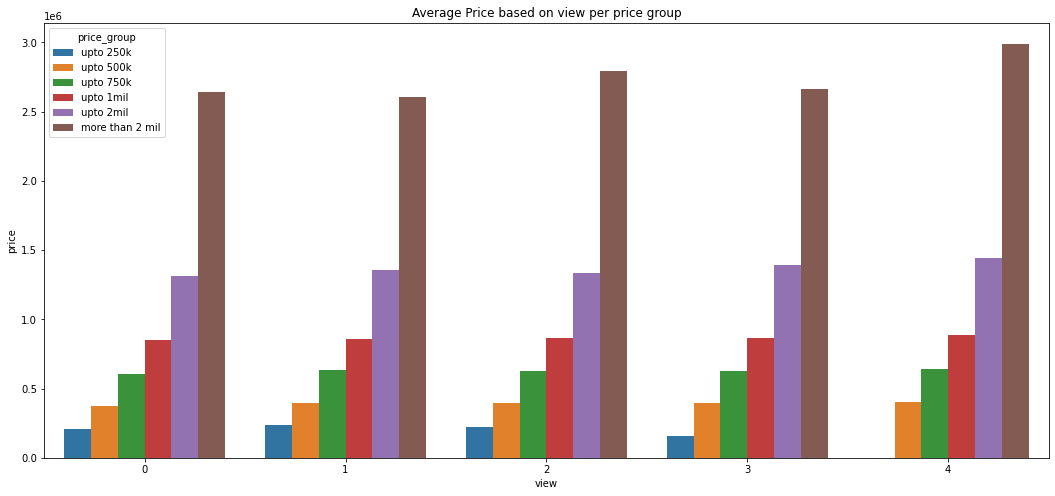

In [1032]:
plt.figure(figsize = (18, 8))
sns.barplot(x = df['view'], y = df['price'], hue = df['price_group'], ci = False)
plt.title('Average Price based on view per price group')

# There's is no major significance of average price and view if we compared it per price group
# the analogy here is even if your houses has the most beautiful view in King County it shouldb't affect the price much

In [1033]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21435 entries, 15951 to 2497
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           21435 non-null  float64 
 1   bedrooms        21435 non-null  float64 
 2   bathrooms       21435 non-null  float64 
 3   sqft_living     21435 non-null  int64   
 4   sqft_lot        21435 non-null  int64   
 5   floors          21435 non-null  float64 
 6   waterfront      21435 non-null  int64   
 7   view            21435 non-null  int64   
 8   condition       21435 non-null  int64   
 9   grade           21435 non-null  int64   
 10  sqft_above      21435 non-null  int64   
 11  sqft_basement   21435 non-null  int64   
 12  yr_built        21435 non-null  int64   
 13  yr_renovated    21435 non-null  int64   
 14  zipcode         21435 non-null  int64   
 15  lat             21435 non-null  float64 
 16  long            21435 non-null  float64 
 17  sqft_livi

In [1034]:
df_upt=df

In [1035]:
df_upt['price'].where(~(df.price < 750000), other=0, inplace=True)
df_upt['price'].where(~(df.price >= 750000), other=1, inplace=True)

<AxesSubplot:xlabel='price', ylabel='count'>

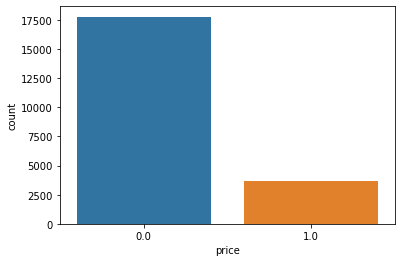

In [1036]:
sns.countplot(df_upt['price'])

In [1037]:
#df_new=df
#Removing attributes dependent on price,Location (lat,long,zipcode) and since age has been computed using Year therefore dropping year
df_upt=df_upt.drop(columns=['yr_built','yr_renovated','year','month','day'])
df_upt=df_upt.drop(columns = ['lat','long', 'zipcode','price_per_sqft','price_group','age_group'])

## Checking for Multi-Collinearity

In [1038]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [1039]:

calc_vif(df_upt)

,variables,VIF
0,price,1.911844
1,bedrooms,23.618261
2,bathrooms,28.326884
3,sqft_living,inf
4,sqft_lot,2.361509
5,floors,16.102304
6,waterfront,1.209538
7,view,1.542349
8,condition,28.136269
9,grade,69.260000


In [1040]:
df_upt= df_upt.drop(['sqft_above'], axis=1)
calc_vif(df_upt)

,variables,VIF
0,price,1.911844
1,bedrooms,23.618261
2,bathrooms,28.326884
3,sqft_living,32.873290
4,sqft_lot,2.361509
5,floors,16.102304
6,waterfront,1.209538
7,view,1.542349
8,condition,28.136269
9,grade,69.260000


In [1041]:
df_upt=df_upt.drop(columns = ['grade'])
calc_vif(df_upt)

,variables,VIF
0,price,1.911749
1,bedrooms,23.362291
2,bathrooms,27.375485
3,sqft_living,32.585991
4,sqft_lot,2.360733
5,floors,13.599107
6,waterfront,1.209514
7,view,1.542169
8,condition,21.470026
9,sqft_basement,2.663237


In [1042]:
df_upt=df_upt.drop(columns = ['sqft_living'])
calc_vif(df_upt)

,variables,VIF
0,price,1.712102
1,bedrooms,21.606453
2,bathrooms,24.408991
3,sqft_lot,2.348999
4,floors,13.412958
5,waterfront,1.208402
6,view,1.542161
7,condition,20.806023
8,sqft_basement,2.254272
9,sqft_living15,16.272650


In [1043]:
df_upt=df_upt.drop(columns = ['bathrooms'])
calc_vif(df_upt)

,variables,VIF
0,price,1.686012
1,bedrooms,18.653438
2,sqft_lot,2.345904
3,floors,10.404546
4,waterfront,1.208154
5,view,1.541862
6,condition,20.369102
7,sqft_basement,1.996378
8,sqft_living15,15.152592
9,sqft_lot15,2.565795


In [1044]:
df_upt=df_upt.drop(columns = ['condition'])
calc_vif(df_upt)

,variables,VIF
0,price,1.608220
1,bedrooms,16.775652
2,sqft_lot,2.345899
3,floors,9.402716
4,waterfront,1.207767
5,view,1.537507
6,sqft_basement,1.985010
7,sqft_living15,14.094795
8,sqft_lot15,2.562651
9,age,2.637402


In [1045]:
df_upt=df_upt.drop(columns = ['bedrooms'])
calc_vif(df_upt)

,variables,VIF
0,price,1.583502
1,sqft_lot,2.345226
2,floors,7.210139
3,waterfront,1.207092
4,view,1.510011
5,sqft_basement,1.751213
6,sqft_living15,10.269231
7,sqft_lot15,2.561983
8,age,2.277859


In [1056]:
x = df_upt.drop(['price'], axis = 1)
y = df['price']

In [1057]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [1058]:
# Feature before mean normalization
unscaled_features = x_train
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_array = sc.fit_transform(x_train.values)
# Assign the scaled data to a DataFrame and use the index and columns arguments to keep original indeces and column names:
x_train = pd.DataFrame(x_train_array, index= x_train.index, columns= x_train.columns)
x_test_array = sc.transform(x_test.values)
x_test = pd.DataFrame(x_test_array, index= x_test.index, columns= x_test.columns)

In [1059]:
from datetime import datetime
start_time = datetime.now()
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
log_model = sm.Logit(y_train, x_train).fit()
print(log_model.summary())
print('speed:', datetime.now() - start_time)

Optimization terminated successfully.
         Current function value: 0.561712
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  price   No. Observations:                17148
Model:                          Logit   Df Residuals:                    17140
Method:                           MLE   Df Model:                            7
Date:                Wed, 23 Mar 2022   Pseudo R-squ.:                 -0.2275
Time:                        19:51:35   Log-Likelihood:                -9632.2
converged:                       True   LL-Null:                       -7847.3
Covariance Type:            nonrobust   LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_lot          0.1019      0.028      3.591      0.000       0.046       0.158
floors            0.

In [1060]:
p_val = pd.DataFrame(log_model.pvalues, columns=['p_value'])
coef = pd.DataFrame(log_model.params, columns= ['coef'])
p_coef = pd.concat([coef, p_val], axis = 1)
p_coef

,coef,p_value
sqft_lot,0.101901,3.288548e-04
floors,0.392503,7.453432e-75
waterfront,4.109533,6.472428e-96
view,0.273246,2.819352e-31
sqft_basement,0.277861,4.610112e-43
sqft_living15,0.917277,0.000000e+00
sqft_lot15,-0.089708,1.250089e-03
age,0.354754,2.844215e-63


In [1061]:
print(p_coef[p_coef['p_value'] < 0.05].sort_values('coef', ascending=False))

                   coef       p_value
waterfront     4.109533  6.472428e-96
sqft_living15  0.917277  0.000000e+00
floors         0.392503  7.453432e-75
age            0.354754  2.844215e-63
sqft_basement  0.277861  4.610112e-43
view           0.273246  2.819352e-31
sqft_lot       0.101901  3.288548e-04
sqft_lot15    -0.089708  1.250089e-03


In [1062]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Classification Report and Confusion Matrix
LogisticRegression()
model=LogisticRegression(solver='liblinear',random_state=0).fit(x_train,y_train)
y_pred=model.predict(x_test)

print("Confusion Matrix\n",confusion_matrix(y_test, model.predict(x_test)))

Confusion Matrix
 [[3466  104]
 [ 339  378]]


In [1063]:
print("Classification Report\n",classification_report(y_test, model.predict(x_test)))

Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      3570
         1.0       0.78      0.53      0.63       717

    accuracy                           0.90      4287
   macro avg       0.85      0.75      0.79      4287
weighted avg       0.89      0.90      0.89      4287



In [1064]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy: 0.897
Precision: 0.784
Recall: 0.527


In [1065]:
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)

MSE: 0.103


# Model 2: Decision Tree

In [1066]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree,metrics

speed: 0:00:10.738927


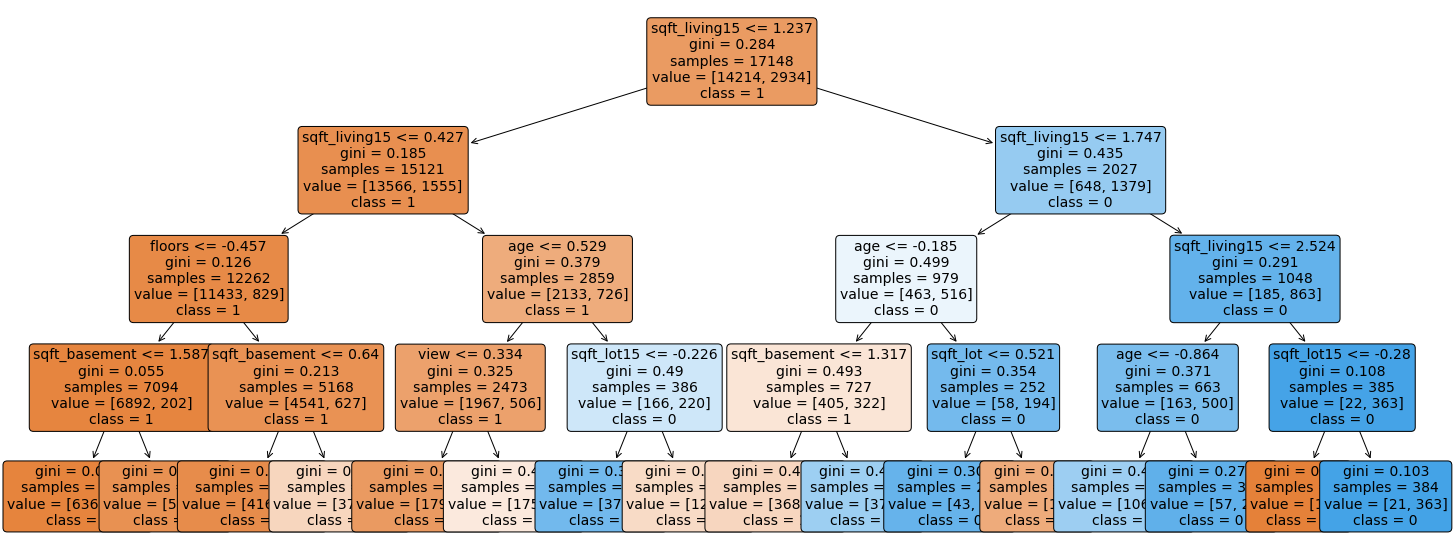

In [1067]:
from datetime import datetime
treemodel= DecisionTreeClassifier(max_depth=4)
treemodel.fit(x_train, y_train)
plt.figure(figsize=(25,10))
plot=tree.plot_tree(treemodel, feature_names=x.columns.values.tolist(), class_names=['1','0'], filled= True, rounded=True, fontsize=14)
print('speed:', datetime.now() - start_time)

In [1068]:
model= treemodel.fit(x_train, y_train)

# Predict the response for the test dataset
y_pred= model.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))


Accuracy:  0.8880335899230231


In [1069]:
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))

Confusion Matrix
 [[3490   80]
 [ 400  317]]


In [1070]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,mean_squared_error
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy: 0.888
Precision: 0.798
Recall: 0.442


In [1071]:
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)

MSE: 0.112


# Model 3: Random Forest

In [1092]:
from datetime import datetime
rfclass=RandomForestClassifier(n_estimators=5, random_state=1)
rfclass.fit(x_train, y_train)
rfypred=rfclass.predict(x_test)
print('speed:', datetime.now() - start_time)
#x_train

speed: 0:03:54.156974


In [1093]:
print("Accuracy: ", accuracy_score(y_test, rfypred))
#rfclass.score(x_test, y_test)
print("Confusion Matrix\n",confusion_matrix(y_test, rfypred))

Accuracy:  0.8885001166316772
Confusion Matrix
 [[3386  184]
 [ 294  423]]


Text(0.5, 0, 'Random Forest Feature Importance')

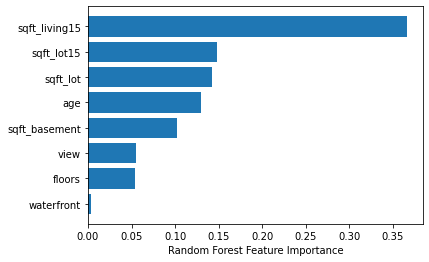

In [1094]:
sorted_idx = rfclass.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], rfclass.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [1095]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, rfypred))
print('Precision: %.3f' % precision_score(y_test, rfypred))
print('Recall: %.3f' % recall_score(y_test, rfypred))

Accuracy: 0.889
Precision: 0.697
Recall: 0.590


In [1096]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, rfypred)
print('MSE: %.3f' % mse)

MSE: 0.111
